In [2]:
import numpy as np
import pandas as pd

In [3]:
df_train = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

In [4]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
len(df_train)

614

In [7]:
len(df_train["LoanAmount"])

614

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']

for col in cat_cols:
    df_train[col] = df_train[col].fillna(df_train[col].mode()[0])

In [11]:
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].median())
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0])

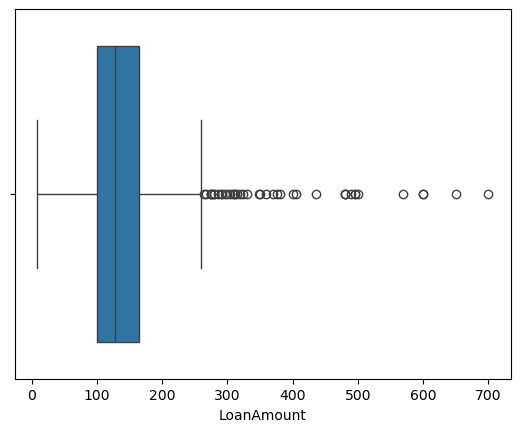

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df_train['LoanAmount'])
plt.show()

In [13]:
import numpy as np

df_train['LoanAmount_log'] = np.log(df_train['LoanAmount'])
df_train['TotalIncome'] = df_train['ApplicantIncome'] + df_train['CoapplicantIncome']
df_train['TotalIncome_log'] = np.log(df_train['TotalIncome'])

In [14]:
df_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [15]:
df_test = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [16]:
df_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [17]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']

for col in cat_cols:
    train_mode = df_train[col].mode()[0]
    df_test[col] = df_test[col].fillna(train_mode)

loan_median = df_train['LoanAmount'].median()
df_test['LoanAmount'] = df_test['LoanAmount'].fillna(loan_median)
    

In [18]:
df_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

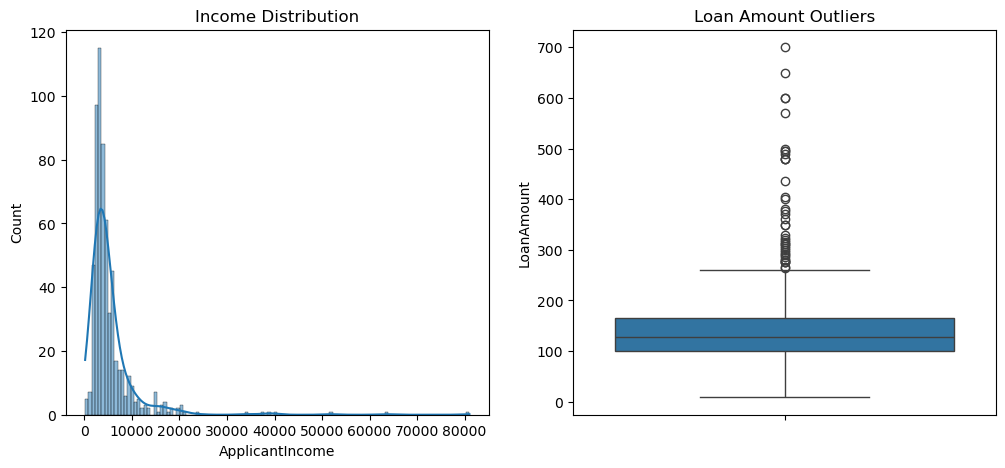

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check distribution of Income and Loan Amount
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.histplot(df_train['ApplicantIncome'], kde=True)
plt.title('Income Distribution')

plt.subplot(122)
sns.boxplot(y=df_train['LoanAmount'])
plt.title('Loan Amount Outliers')
plt.show()

C:\Users\panka\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


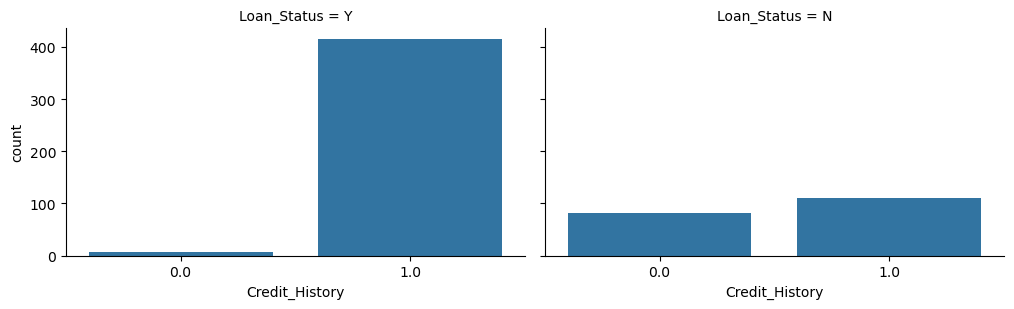

In [20]:
# See how Credit History affects Loan Approval
grid = sns.FacetGrid(df_train, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History')
plt.show()

In [21]:
import numpy as np

# 1. Create Total Income
df_train['Total_Income'] = df_train['ApplicantIncome'] + df_train['CoapplicantIncome']

# 2. Apply Log Transform to fix the skewness you saw in the histogram
df_train['ApplicantIncome_log'] = np.log(df_train['ApplicantIncome'] + 1) # +1 to avoid log(0)
df_train['LoanAmount_log'] = np.log(df_train['LoanAmount'] + 1)
df_train['Total_Income_log'] = np.log(df_train['Total_Income'] + 1)

# 3. Drop the original skewed columns so the model doesn't get confused
df_train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_Income'], axis=1, inplace=True)

In [22]:
import numpy as np

df_test['Total_Income'] = df_test['ApplicantIncome'] + df_test['CoapplicantIncome']
df_test['Total_Income_log'] = np.log(df_test['Total_Income'])

df_test['LoanAmount_log'] = np.log(df_test['LoanAmount'])

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Loan_ID              614 non-null    object 
 1   Gender               614 non-null    object 
 2   Married              614 non-null    object 
 3   Dependents           614 non-null    object 
 4   Education            614 non-null    object 
 5   Self_Employed        614 non-null    object 
 6   Loan_Amount_Term     614 non-null    float64
 7   Credit_History       614 non-null    float64
 8   Property_Area        614 non-null    object 
 9   Loan_Status          614 non-null    object 
 10  LoanAmount_log       614 non-null    float64
 11  TotalIncome          614 non-null    float64
 12  TotalIncome_log      614 non-null    float64
 13  ApplicantIncome_log  614 non-null    float64
 14  Total_Income_log     614 non-null    float64
dtypes: float64(7), object(8)
memory usage: 7

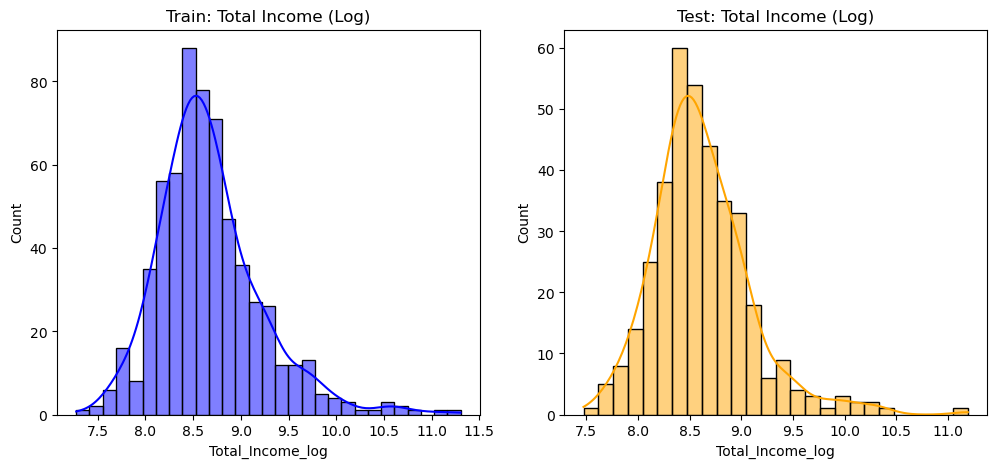

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Comparison of Total Income Distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_train['Total_Income_log'], kde=True, color='blue').set_title('Train: Total Income (Log)')
plt.subplot(1, 2, 2)
sns.histplot(df_test['Total_Income_log'], kde=True, color='orange').set_title('Test: Total Income (Log)')
plt.show()

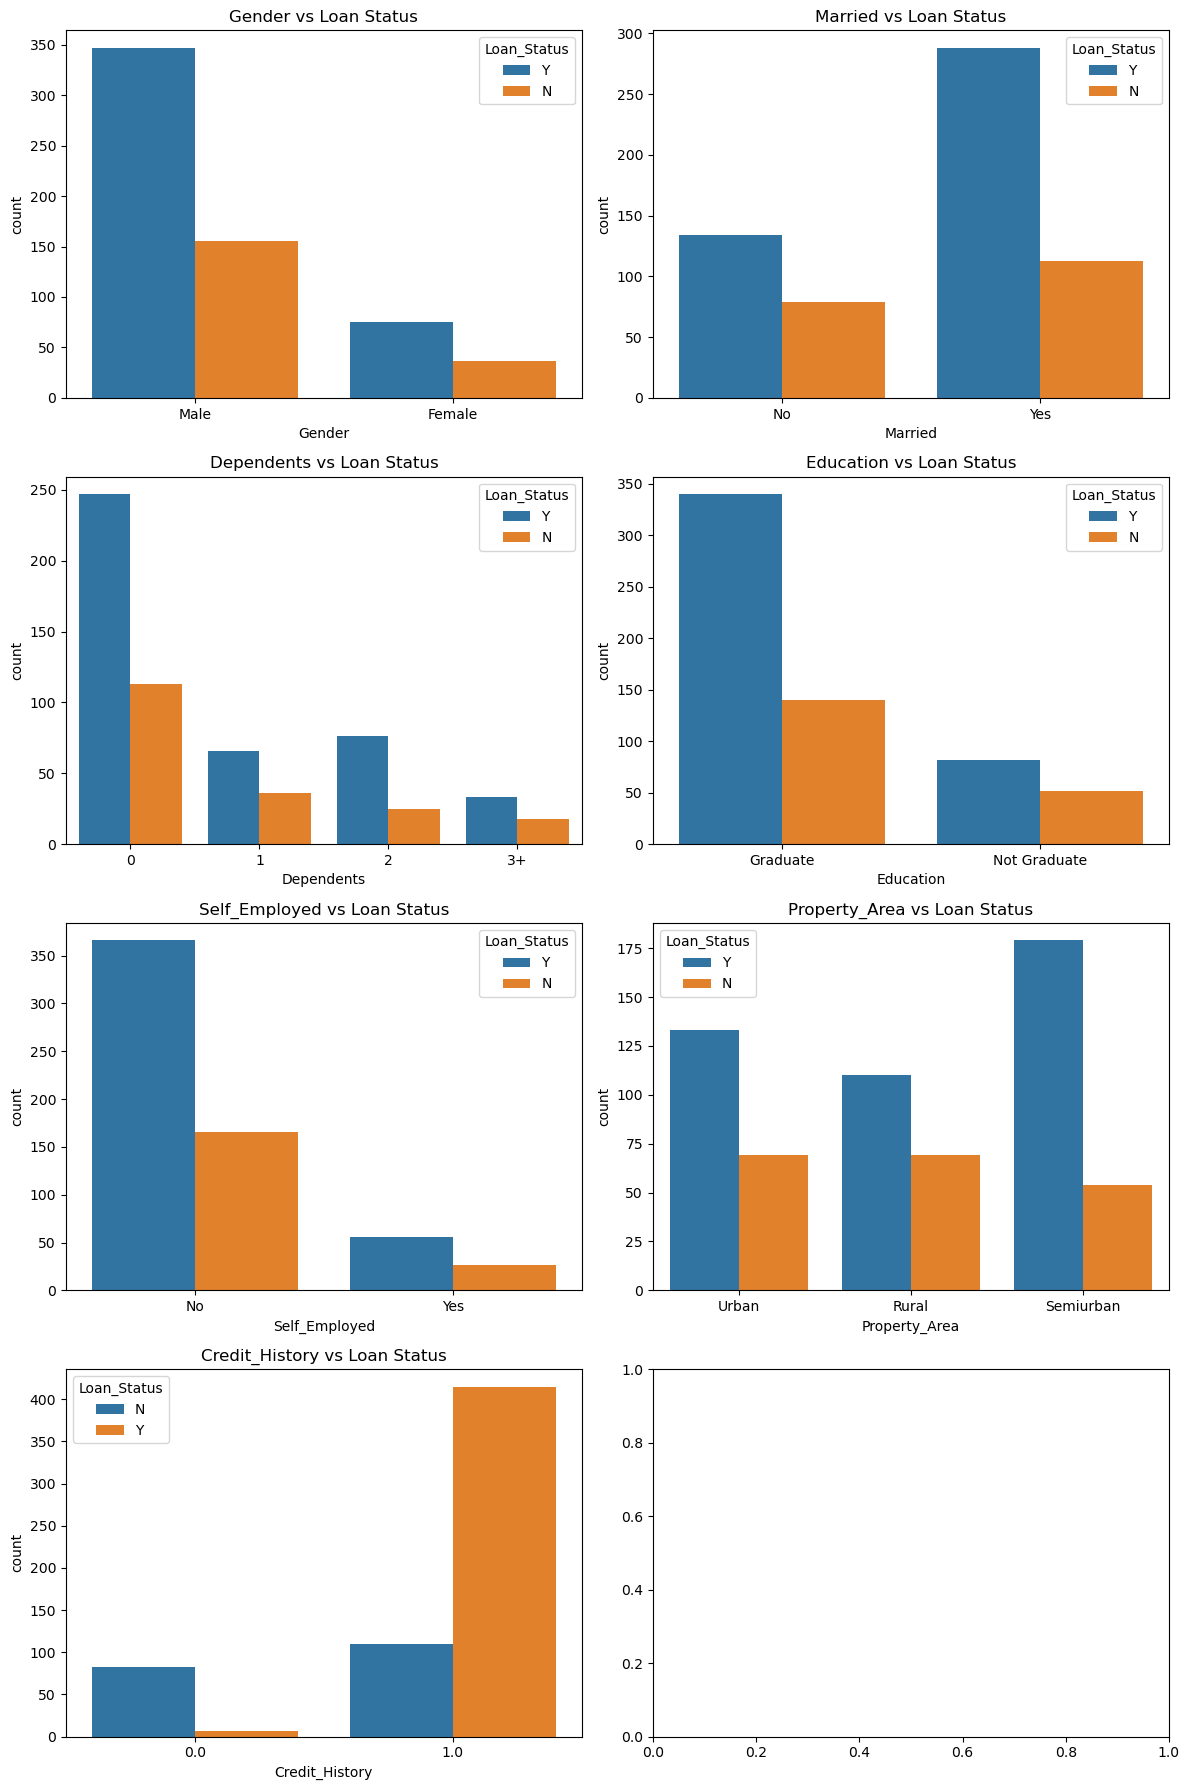

In [25]:
# Analyzing categorical variables vs. Loan_Status
cat_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']

fig, axes = plt.subplots(4, 2, figsize=(12, 18))
axes = axes.flatten()

for i, col in enumerate(cat_features):
    sns.countplot(x=col, hue='Loan_Status', data=df_train, ax=axes[i])
    axes[i].set_title(f'{col} vs Loan Status')

plt.tight_layout()
plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
le = LabelEncoder()

# List of all categorical columns (including your Target)
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

for col in cat_cols:
    # We use fit_transform on train to turn strings into 0, 1, 2...
    df_train[col] = le.fit_transform(df_train[col])
    
    # Do the same for test (except Loan_Status which isn't in test)
    if col in df_test.columns:
        df_test[col] = le.transform(df_test[col])

# Handle 'Dependents' specifically because of '3+'
df_train['Dependents'] = df_train['Dependents'].replace('3+', 3).astype(int)
df_test['Dependents'] = df_test['Dependents'].replace('3+', 3).astype(int)

In [27]:
# Keep ONLY the log version for the model
cols_to_drop = ['Loan_ID', 'TotalIncome', 'ApplicantIncome_log', 'Total_Income'] # Adjust based on your exact names
df_train.drop(columns=[c for c in cols_to_drop if c in df_train.columns], inplace=True)
df_test.drop(columns=[c for c in cols_to_drop if c in df_test.columns], inplace=True)

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    int64  
 1   Married           614 non-null    int64  
 2   Dependents        614 non-null    int64  
 3   Education         614 non-null    int64  
 4   Self_Employed     614 non-null    int64  
 5   Loan_Amount_Term  614 non-null    float64
 6   Credit_History    614 non-null    float64
 7   Property_Area     614 non-null    int64  
 8   Loan_Status       614 non-null    int64  
 9   LoanAmount_log    614 non-null    float64
 10  TotalIncome_log   614 non-null    float64
 11  Total_Income_log  614 non-null    float64
dtypes: float64(5), int64(7)
memory usage: 57.7 KB


In [29]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    int64  
 1   Married            367 non-null    int64  
 2   Dependents         367 non-null    int64  
 3   Education          367 non-null    int64  
 4   Self_Employed      367 non-null    int64  
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    int64  
 11  Total_Income_log   367 non-null    float64
 12  LoanAmount_log     367 non-null    float64
dtypes: float64(5), int64(8)
memory usage: 37.4 KB


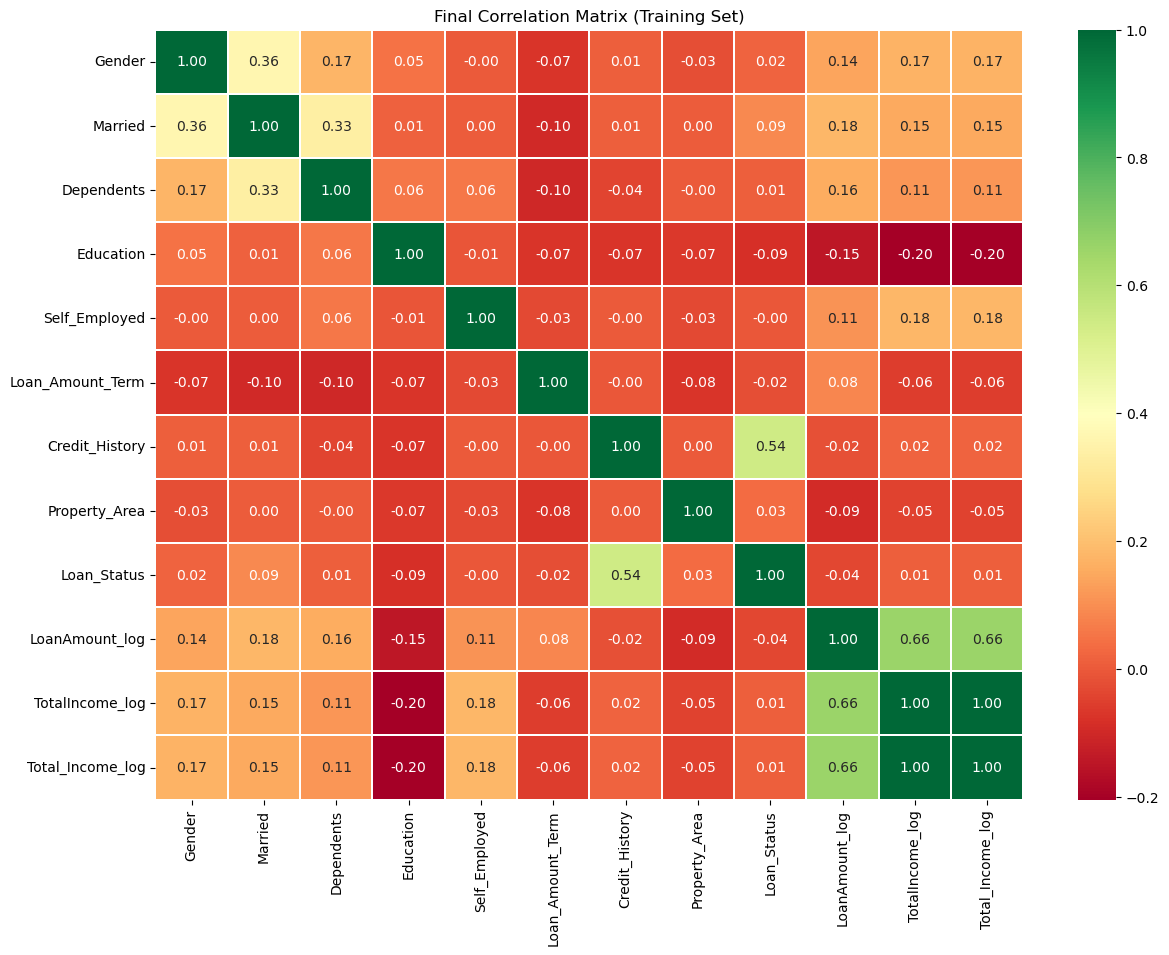

In [30]:
# Note: You MUST encode the target 'Loan_Status' to 0/1 first to see it here
plt.figure(figsize=(14, 10))
sns.heatmap(df_train.drop('Loan_ID', axis=1, errors='ignore').corr(), 
            annot=True, cmap='RdYlGn', fmt='.2f', linewidths=0.2)
plt.title('Final Correlation Matrix (Training Set)')
plt.show()

In [31]:
# Drop redundant or non-predictive columns
# Keep one income log and one loan log
cols_to_drop = ['TotalIncome_log'] # Because it's a 1.0 correlation with Total_Income_log

df_train.drop(columns=cols_to_drop, inplace=True, errors='ignore')
df_test.drop(columns=cols_to_drop, inplace=True, errors='ignore')

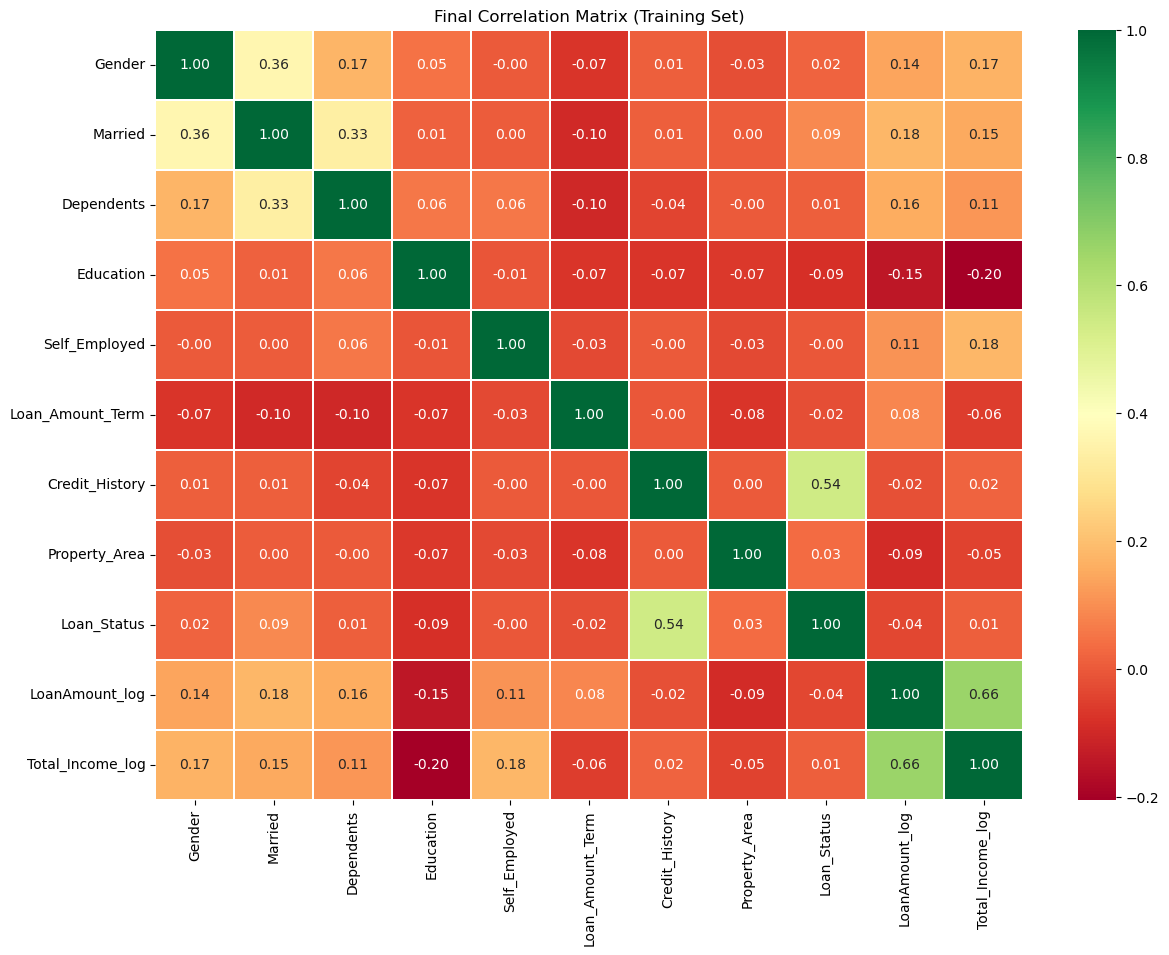

In [32]:
# Note: You MUST encode the target 'Loan_Status' to 0/1 first to see it here
plt.figure(figsize=(14, 10))
sns.heatmap(df_train.drop('Loan_ID', axis=1, errors='ignore').corr(), 
            annot=True, cmap='RdYlGn', fmt='.2f', linewidths=0.2)
plt.title('Final Correlation Matrix (Training Set)')
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [34]:
X = df_train.drop('Loan_Status',axis=1)
y = df_train["Loan_Status"]

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2)

lr_model = LogisticRegression(max_iter = 1000)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_val)
print(f"Baseline Accuracy: {accuracy_score(y_val, y_pred):.2f}")
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Baseline Accuracy: 0.78

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.37      0.54        43
           1       0.75      1.00      0.86        80

    accuracy                           0.78       123
   macro avg       0.87      0.69      0.70       123
weighted avg       0.84      0.78      0.75       123



In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=5)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_val)
print(f"Random Forest Accuracy: {accuracy_score(y_val, rf_pred):.2f}")

Random Forest Accuracy: 0.79


In [36]:
# Re-train with better parameters
rf_model_v2 = RandomForestClassifier(n_estimators=200, 
                                     max_depth=10, 
                                     class_weight='balanced', 
                                     random_state=42)
rf_model_v2.fit(X_train, y_train)

# Check if Recall for class 0 improves
new_pred = rf_model_v2.predict(X_val)
print(f"Random Forest Accuracy: {accuracy_score(y_val, new_pred):.2f}")
print(classification_report(y_val, new_pred))

Random Forest Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.95      0.44      0.60        43
           1       0.77      0.99      0.86        80

    accuracy                           0.80       123
   macro avg       0.86      0.71      0.73       123
weighted avg       0.83      0.80      0.77       123



In [37]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, recall_score

# 1. Prepare Features and Target
X = df_train.drop('Loan_Status', axis=1)
y = df_train['Loan_Status']

# 2. Define multiple evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# 3. Perform 5-Fold Cross-Validation 
# This treats different parts of your data as 'test sets' 5 different times
cv_results = cross_validate(rf_model_v2, X, y, cv=5, scoring=scoring)

# 4. Display the results
print("--- Professional Evaluation Results (Cross-Validation) ---")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.2f}")
print(f"Mean Recall (Class 1): {cv_results['test_recall'].mean():.2f}")
print(f"Mean F1-Score: {cv_results['test_f1'].mean():.2f}")
print("-" * 50)

# 5. Generate Final Predictions for df_test
# Ensure df_test has the exact same columns as X
X_test = df_test[X.columns]
final_test_predictions = rf_model_v2.predict(X_test)

# 6. Final Output Check
import pandas as pd
submission = pd.DataFrame({
    "Loan_ID": df_test.index, 
    "Predicted_Status": ['Y' if p == 1 else 'N' for p in final_test_predictions]
})

print("Distribution of Final Test Predictions:")
print(submission['Predicted_Status'].value_counts(normalize=True))

--- Professional Evaluation Results (Cross-Validation) ---
Mean Accuracy: 0.78
Mean Recall (Class 1): 0.93
Mean F1-Score: 0.85
--------------------------------------------------
Distribution of Final Test Predictions:
Predicted_Status
Y    0.811989
N    0.188011
Name: proportion, dtype: float64


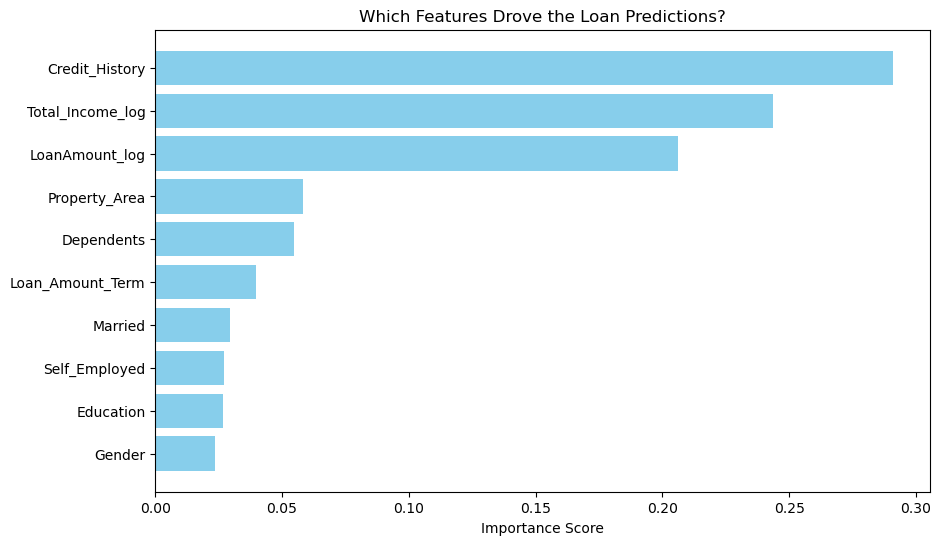

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Get feature importance from your Random Forest model
importances = rf_model_v2.feature_importances_
feature_names = X_train.columns

# 2. Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

# 3. Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Which Features Drove the Loan Predictions?')
plt.show()

In [39]:
import pickle

# Save the model to disk
with open('loan_model.pkl', 'wb') as file:
    pickle.dump(rf_model_v2, file)